In [1]:
#Imports
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read data
df_train = pd.read_csv("telefonica-talentum-ai-2019/Data/houses_train.csv")
df_test = pd.read_csv("telefonica-talentum-ai-2019/Data/houses_1_test.csv")

In [3]:
#Data visualization
#df_train.head(2)

In [4]:
#df_test.head(2)

In [5]:
#Discard all non numeric values
df_train = df_train.select_dtypes(['number'])
df_test = df_test.select_dtypes(['number'])

In [6]:
#Check missing values
df_train.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

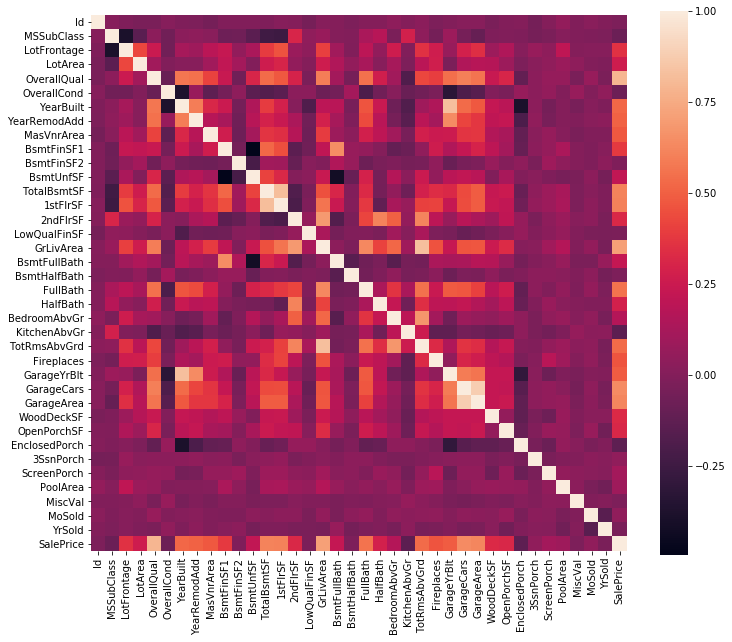

In [7]:
#Get stats
corr = df_train.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
#sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.heatmap(corr, square=True)


In [8]:
#Small exploration to drop unnecessary columns
#Garage cars is very correlated with Garage Area
df_train = df_train.drop(columns="GarageCars")
df_train = df_train.drop(columns="GarageYrBlt")
df_train = df_train.drop(columns="GrLivArea")
df_train = df_train.drop(columns="LotFrontage")
df_train = df_train.drop(columns="PoolArea")
df_train = df_train.drop(columns="Id")
df_train = df_train.drop(columns="MasVnrArea")

In [9]:
#Select test columns
df_test = df_test[df_train.columns]

In [10]:
#Separe fetures from labels
x = df_train.drop(columns="SalePrice").to_numpy().astype("float64")
y = df_train["SalePrice"].to_numpy().astype("float64")
x_test = df_test.drop(columns="SalePrice").to_numpy().astype("float64")
y_test = df_test["SalePrice"].to_numpy().astype("float64")

In [11]:
reg = linear_model.LinearRegression()
reg.fit(x, y)
print("Model coeficients shape: " + str(reg.coef_.shape))
print("Model bias: " + str(reg.intercept_))

Model coeficients shape: (30,)
Model bias: 470777.4489441555


In [12]:
#TEST MODEL
y_pred = reg.predict(x_test)

#Mean square error
print('Mean squared error: ' + str(mean_squared_error(y_test, y_pred)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: '+ str(r2_score(y_test, y_pred)))

Mean squared error: 756649784.1392174
Coefficient of determination: 0.8647059462865931


Data shape: (300, 30)
Labels test: (300,)
Labels predict: (300,)
Score over train: 0.8065535200930715
Score over test: 0.864705946286593


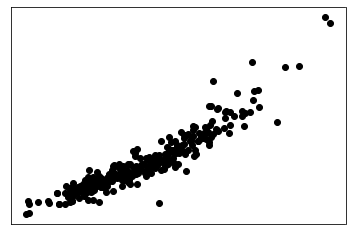

In [13]:
#Matrix shape
print("Data shape: " + str(x_test.shape))
print("Labels test: " + str(y_test.shape))
print("Labels predict: " + str(y_pred.shape))

#Evaluate the model
print("Score over train: " +str(reg.score(x, y)))
print("Score over test: " +str(reg.score(x_test, y_test)))

plt.scatter(y_pred, y_test,  color='black')
#plt.plot(x_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

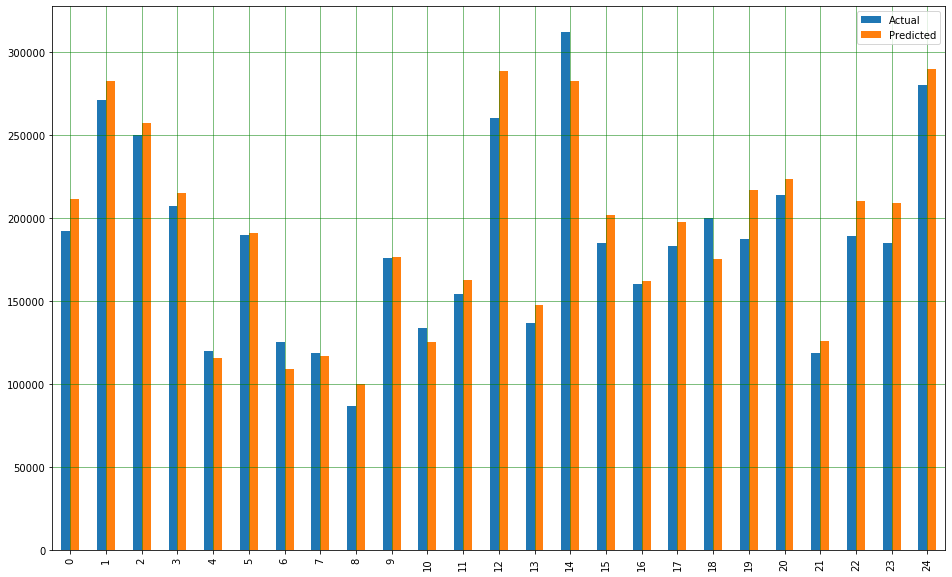

In [14]:
#Another test
df_test_model = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()}).head(25)
df_test_model.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Lasso Cross Validation

In [15]:
#Test Lasso Cross Validation
print("LASSO")
reg_lasso = linear_model.LassoCV(cv=5, n_alphas=100, random_state=1)
reg_lasso.fit(x, y)
y_pred = reg_lasso.predict(x_test)
#Print model
print("Model coeficients shape: " + str(reg_lasso.coef_.shape))
print("Model bias: " + str(reg_lasso.intercept_))
#Evaluate the model
print("Score over train: " +str(reg_lasso.score(x, y)))
print("Score over test: " +str(reg_lasso.score(x_test, y_test)))
print(reg_lasso.alpha_)

LASSO
Model coeficients shape: (30,)
Model bias: -827599.6423497647
Score over train: 0.7171903389444905
Score over test: 0.7856491601636802
209067.77468299225


# Lasso Alpha 0.1

In [30]:
#Test Lasso aplha 0.1
reg_lasso = linear_model.Lasso(alpha=0.1)
reg_lasso.fit(x, y)
y_pred = reg_lasso.predict(x_test)

#Print model
print("Model coeficients shape: " + str(reg_lasso.coef_.shape))
print("Model bias: " + str(reg_lasso.intercept_))

#Evaluate the model
print("Score over train: " +str(reg_lasso.score(x, y)))
print("Score over test: " +str(reg_lasso.score(x_test, y_test)))

Model coeficients shape: (30,)
Model bias: 470655.7831523566
Score over train: 0.8065535199336029
Score over test: 0.8647060163102217


# Ridge

In [31]:
reg_ridge = linear_model.Ridge(alpha=.9)
reg_ridge.fit(x, y)
y_pred = reg_ridge.predict(x_test)

#Print model
print("Model coeficients shape: " + str(reg_ridge.coef_.shape))
print("Model bias: " + str(reg_ridge.intercept_))

#Evaluate the model
print("Score over train: " +str(reg_ridge.score(x, y)))
print("Score over test: " +str(reg_ridge.score(x_test, y_test)))

Model coeficients shape: (30,)
Model bias: 469670.8359332817
Score over train: 0.8065530919104175
Score over test: 0.8647027770170223
